In [22]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Load Dataset
diamonds = sns.load_dataset('diamonds')
print("Shape:", diamonds.shape)
print("\nColumns:", diamonds.columns.to_list())
diamonds.head()

# 3. Initial Overview
print("\nData Types:\n", diamonds.dtypes)
print("\nMissing Values:\n", diamonds.isnull().sum())
print("\nSummary Statistics:\n", diamonds.describe(include='all'))


Shape: (53940, 10)

Columns: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Data Types:
 carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

Missing Values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Summary Statistics:
                carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN   

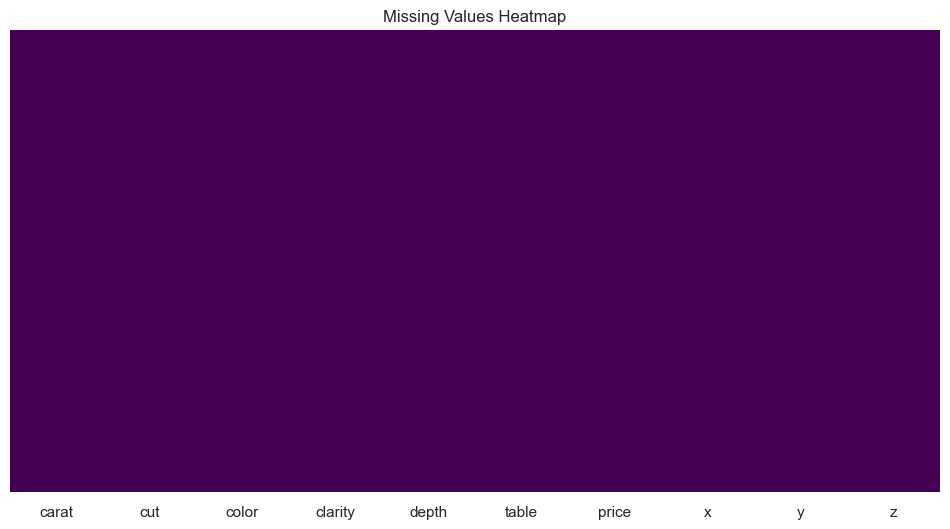

In [23]:
sns.heatmap(diamonds.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


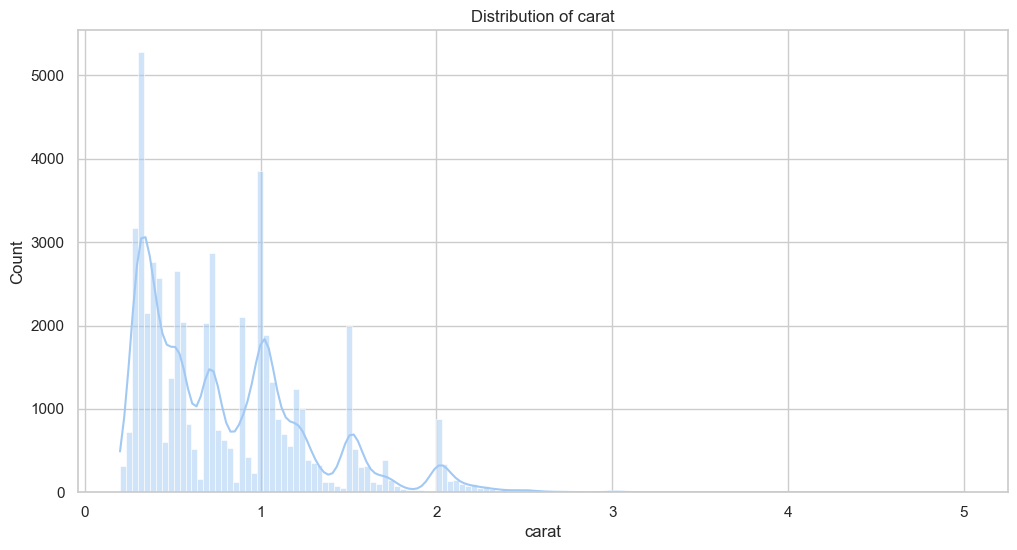

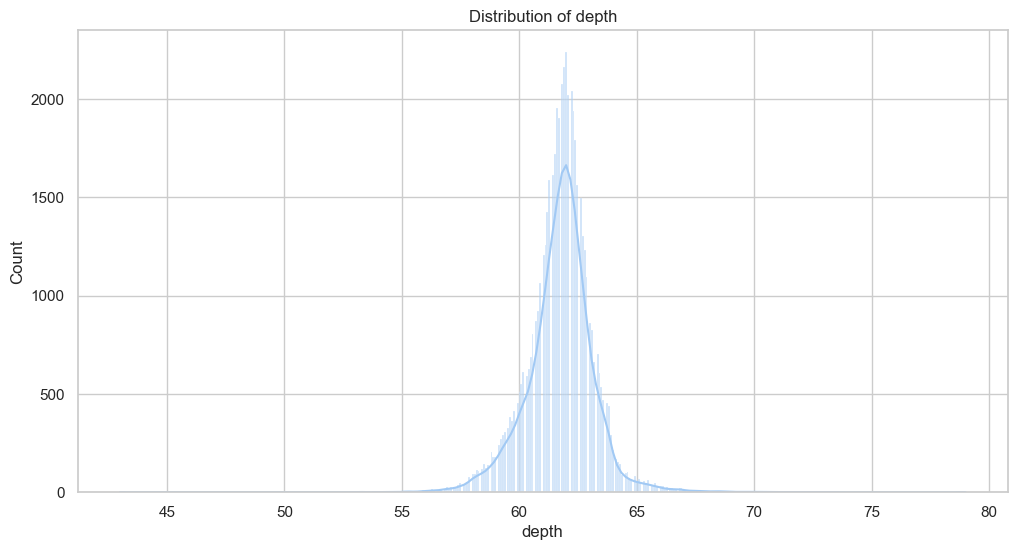

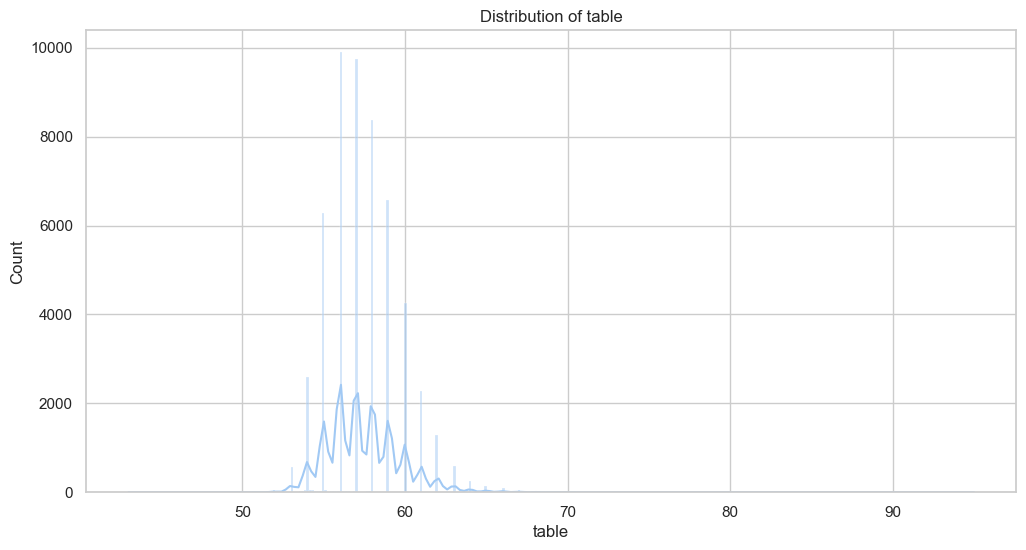

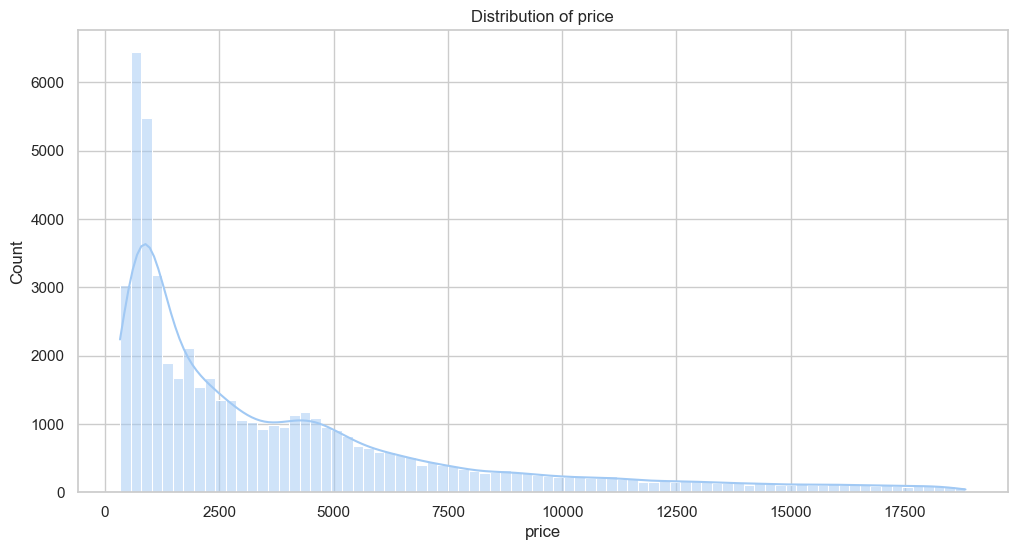

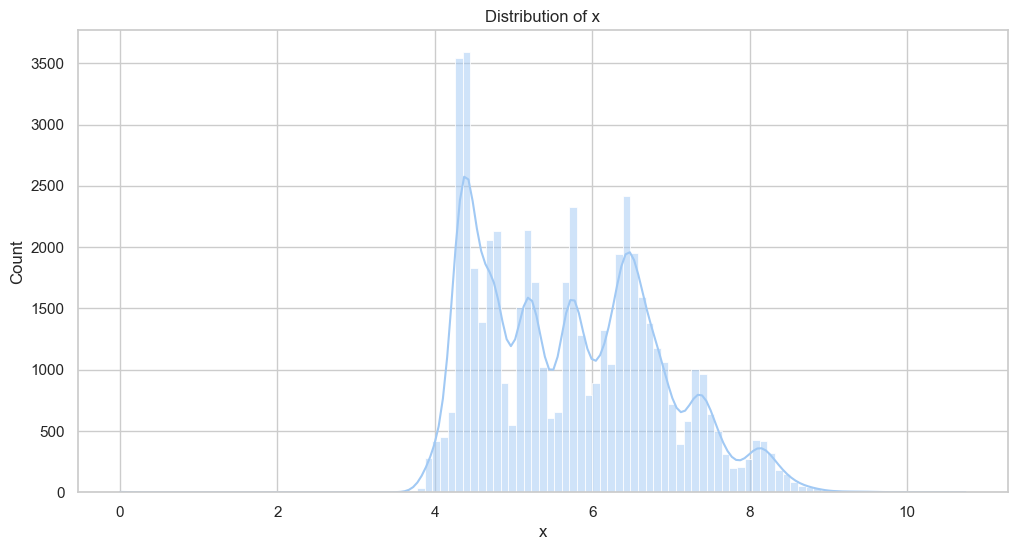

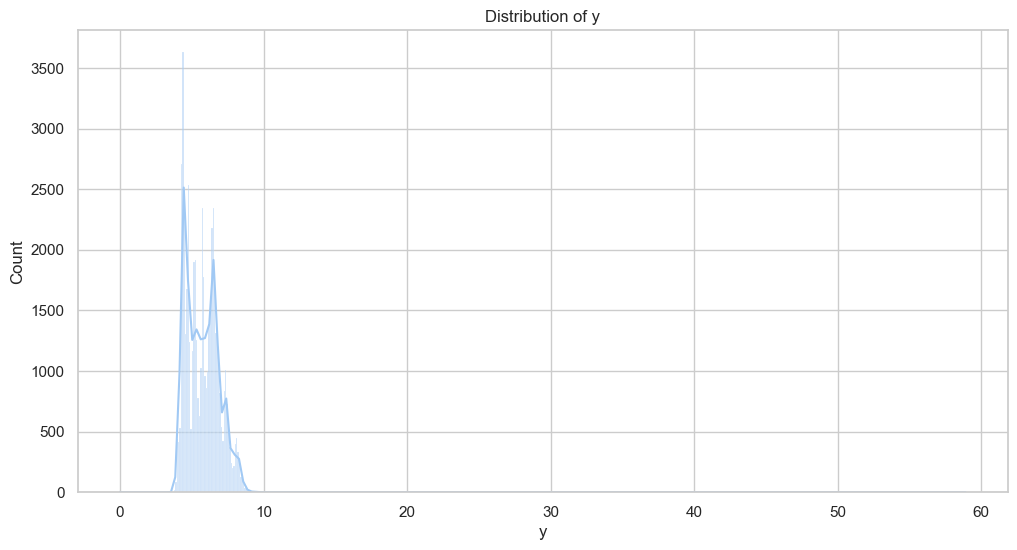

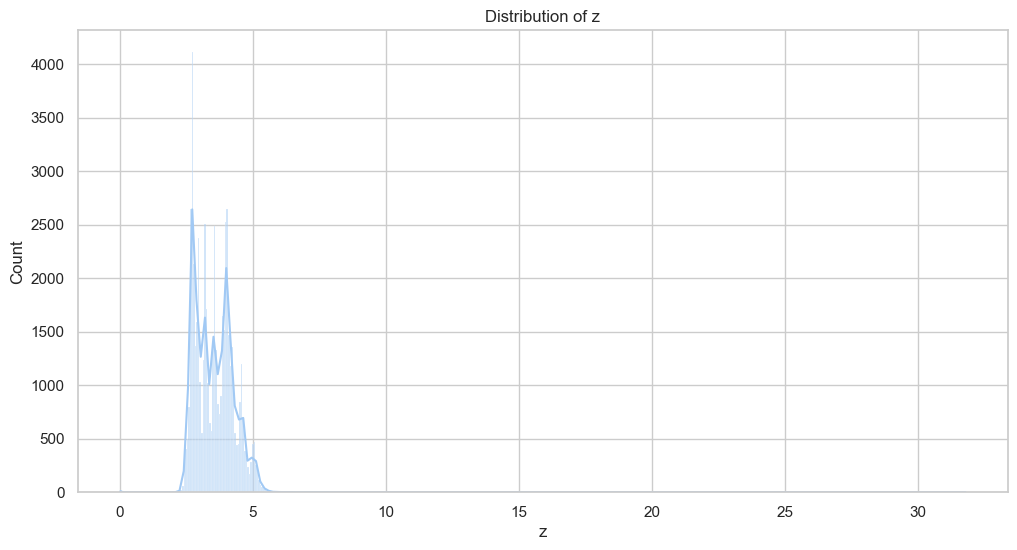

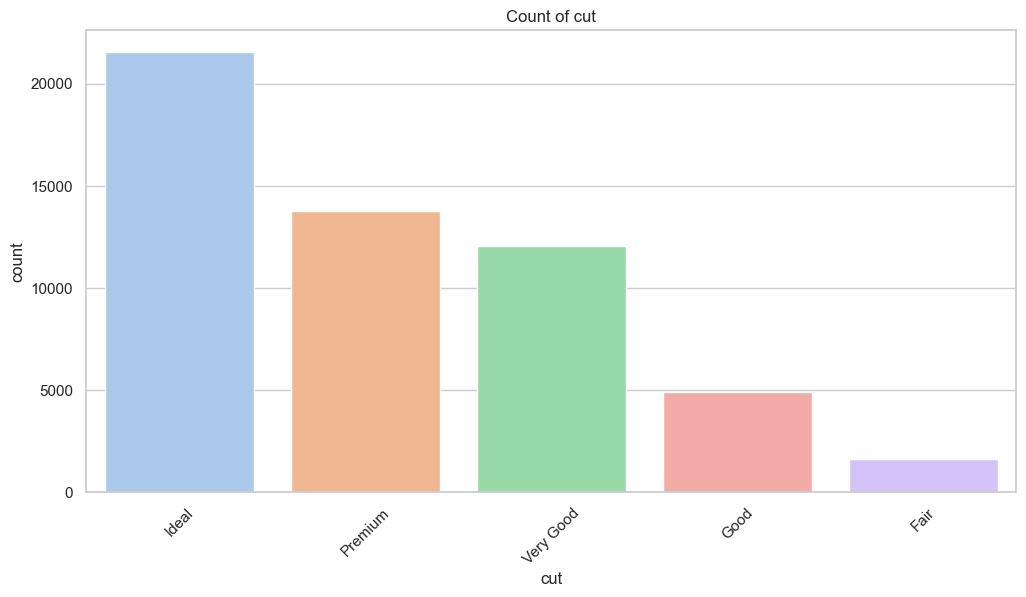

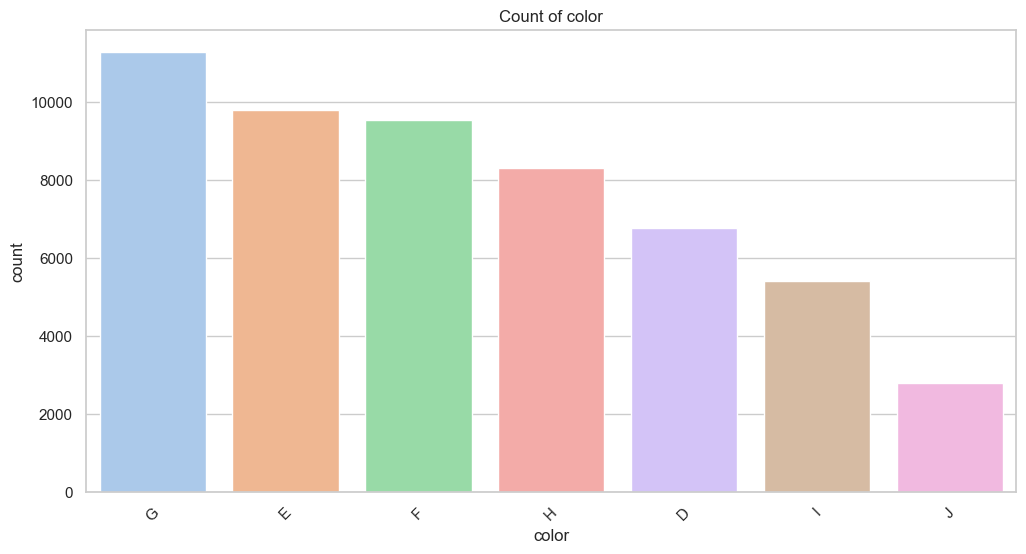

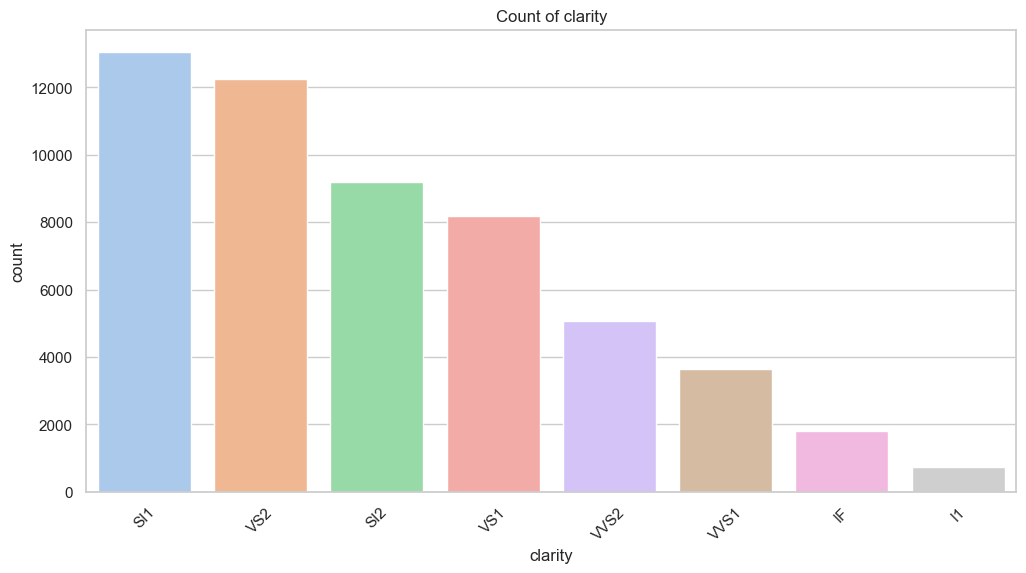

In [24]:
#Univariate Analysis
# Numerical Columns
num_cols = diamonds.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure()
    sns.histplot(diamonds[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical Columns
cat_cols = diamonds.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=diamonds, order=diamonds[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


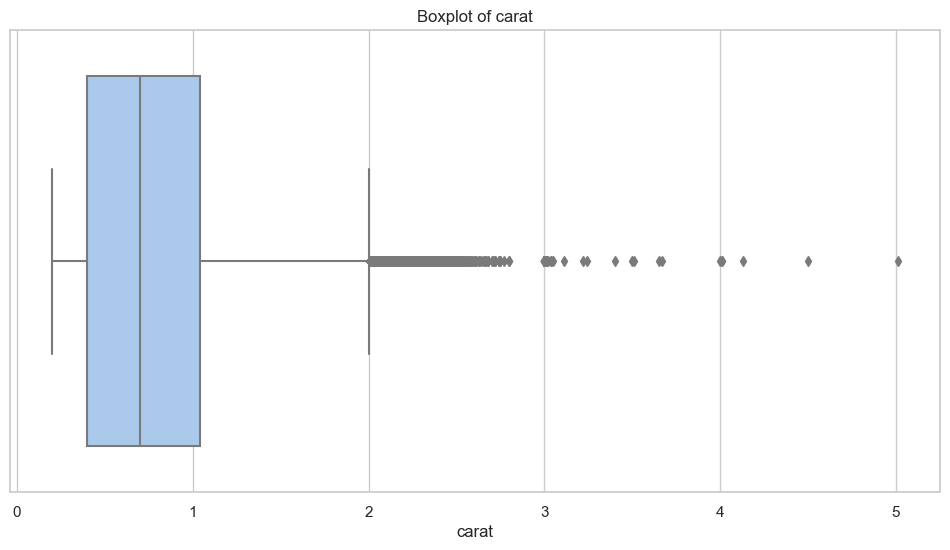

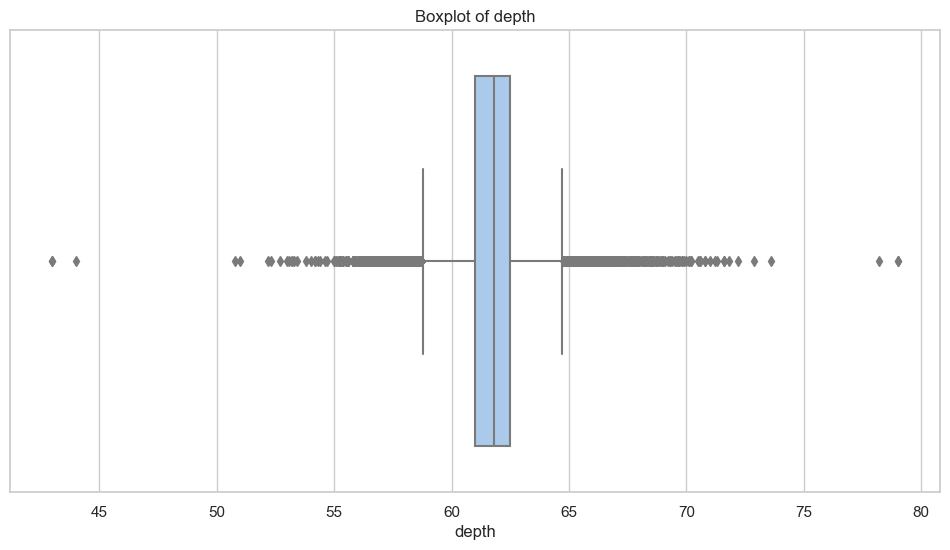

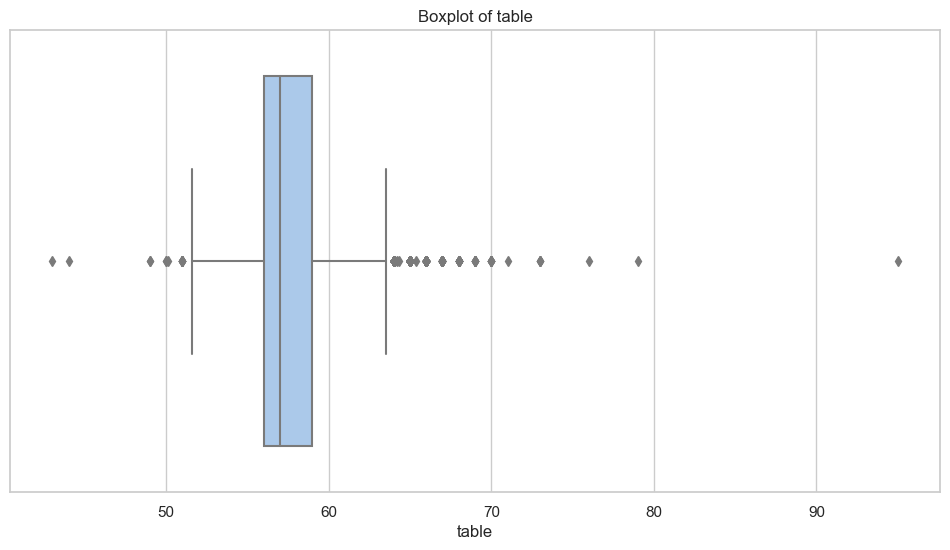

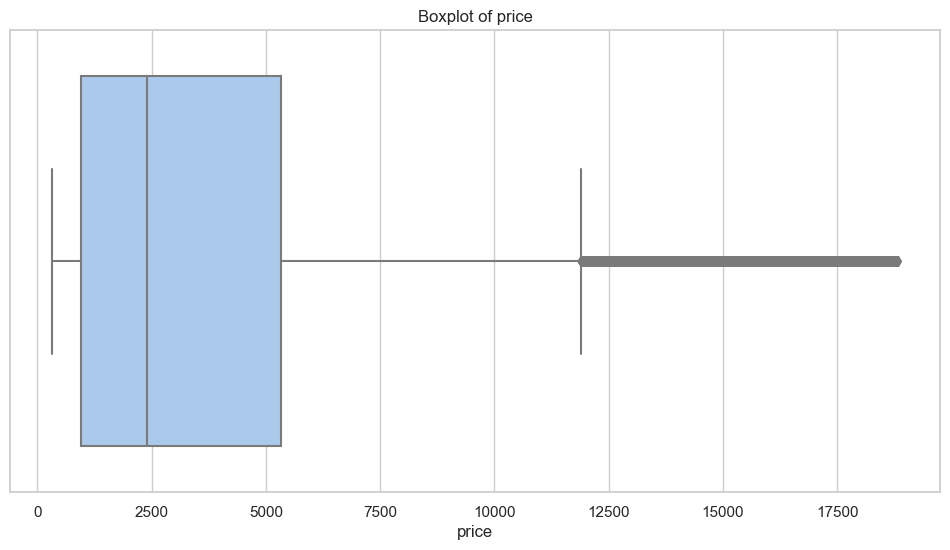

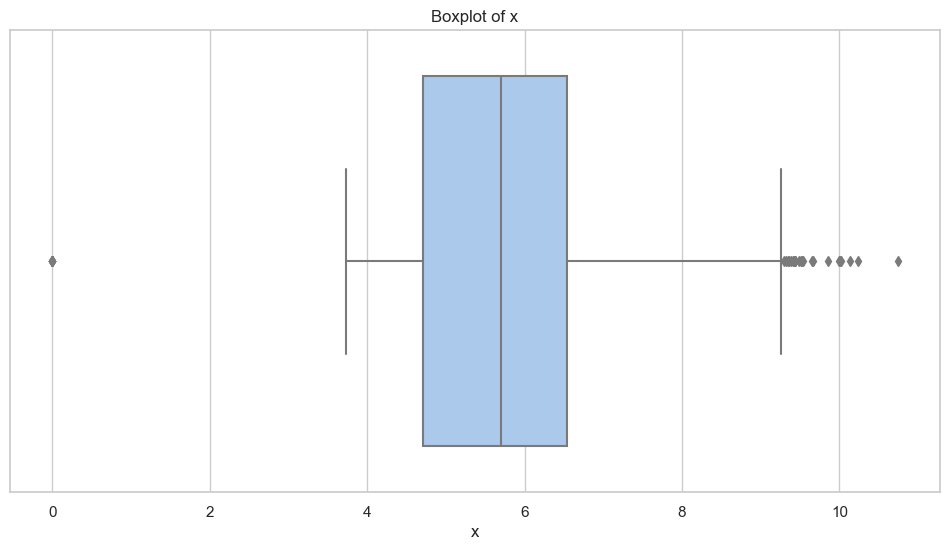

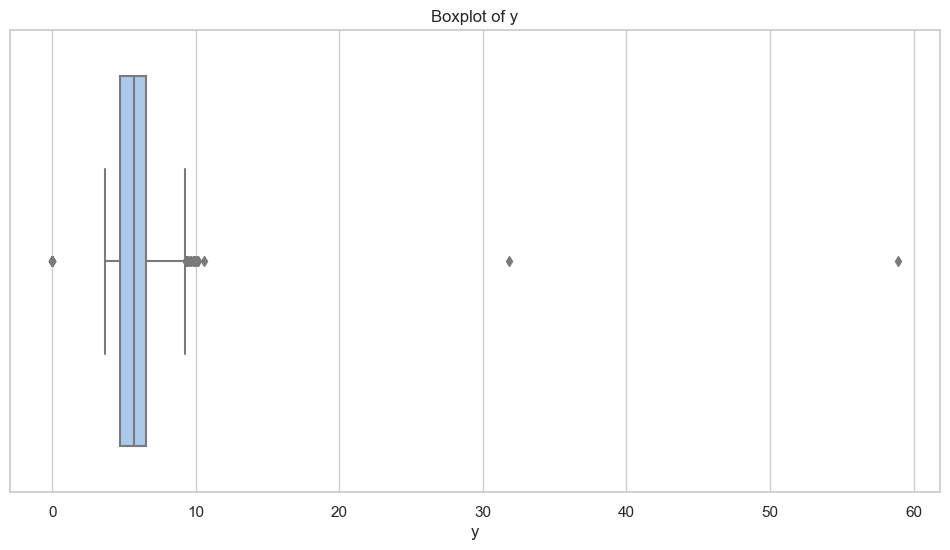

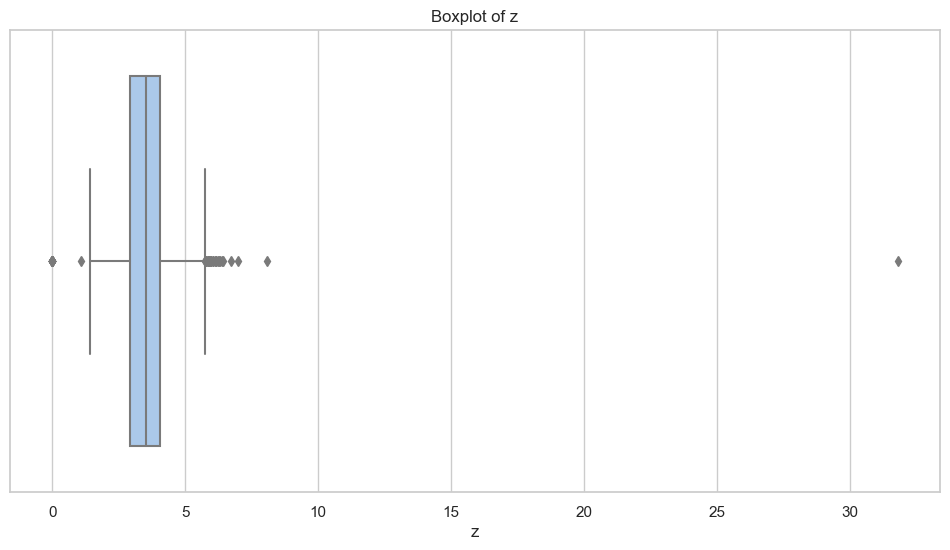

In [25]:
#Boxplot for Outlier analysis
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure()
    sns.boxplot(x=diamonds[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


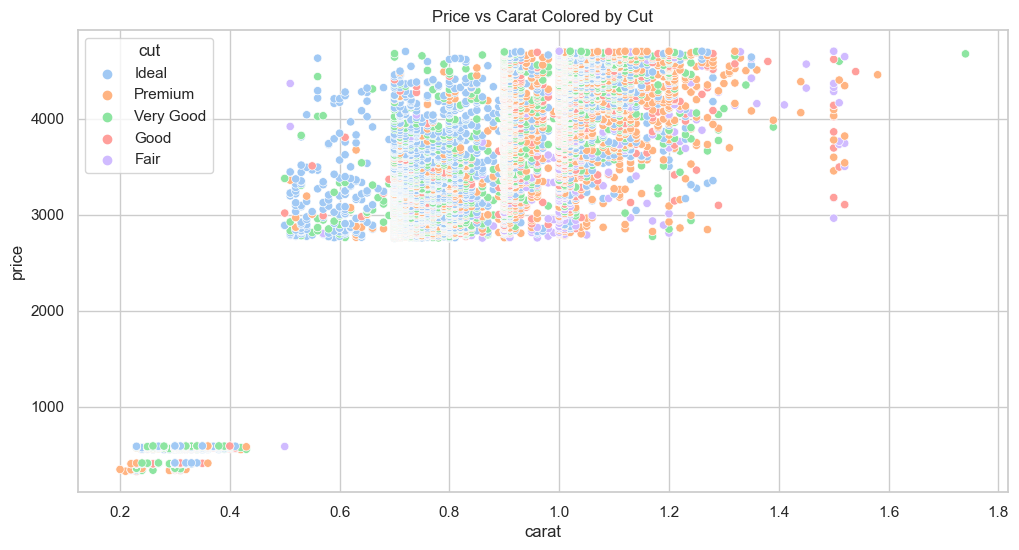

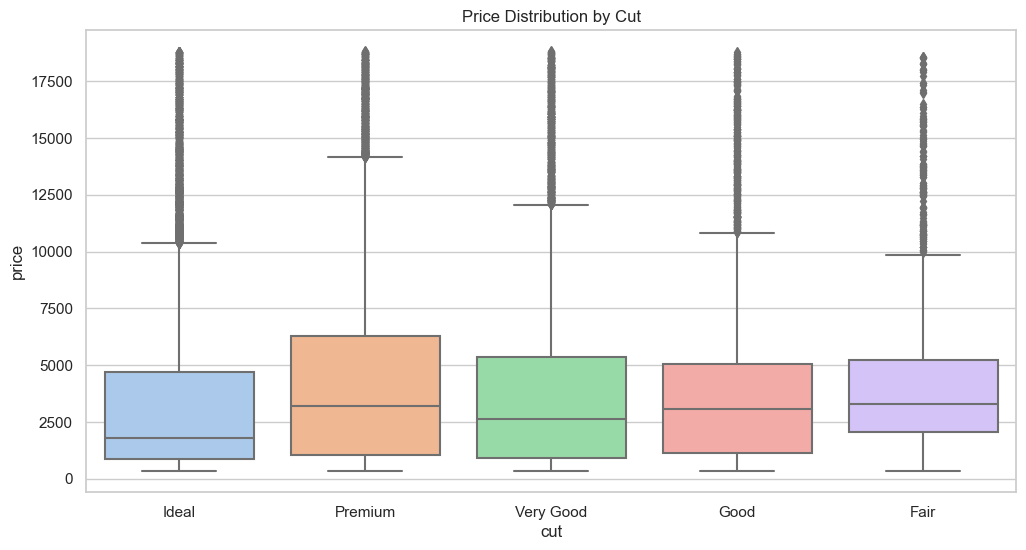

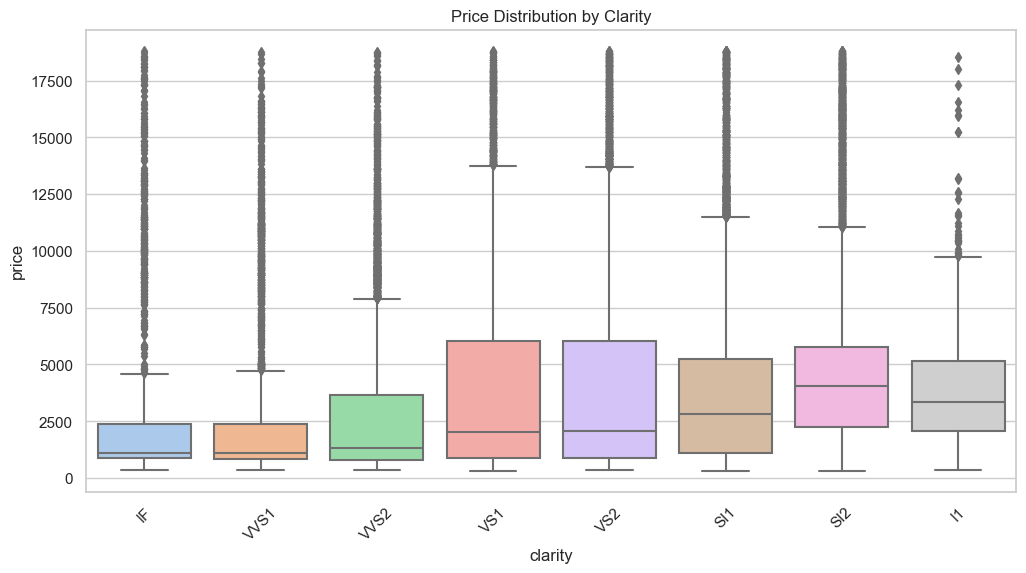

In [26]:
#Bivariate Analysis
# Price vs Carat
sns.scatterplot(x='carat', y='price', hue='cut', data=diamonds[:10000])  # limit to first 10k for visibility
plt.title("Price vs Carat Colored by Cut")
plt.show()

# Price vs Cut
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title("Price Distribution by Cut")
plt.show()

# Price vs Clarity
sns.boxplot(x='clarity', y='price', data=diamonds)
plt.title("Price Distribution by Clarity")
plt.xticks(rotation=45)
plt.show()


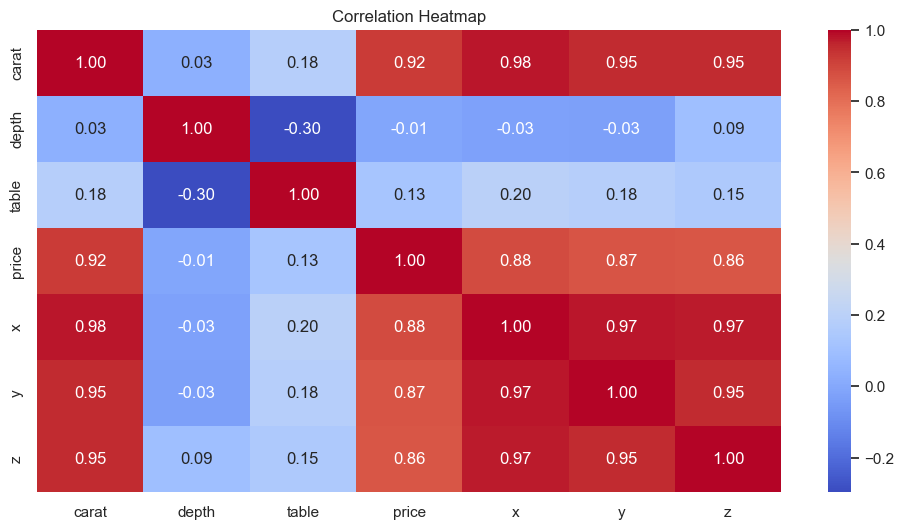

In [27]:
#Feature Analysis
# Correlation Heatmap
corr = diamonds[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


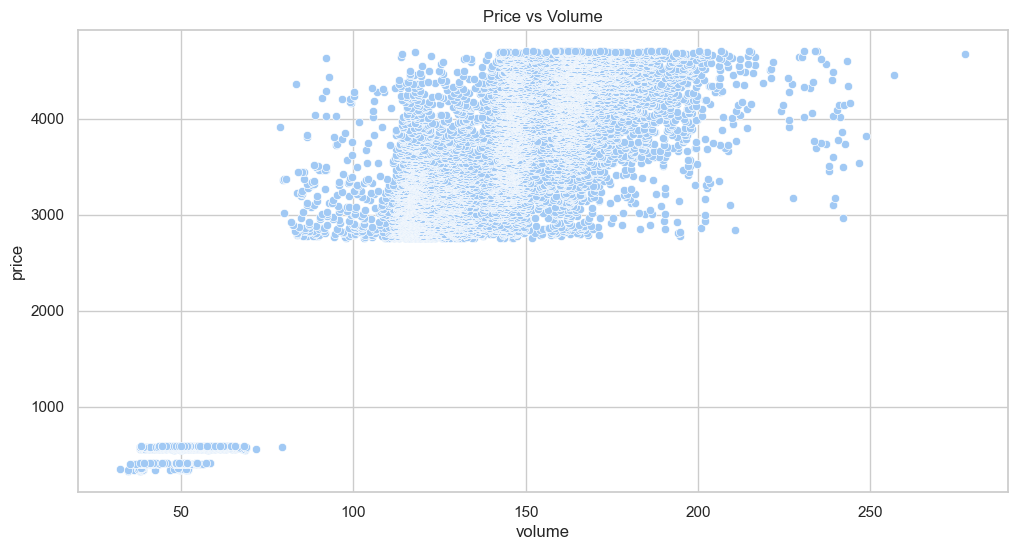

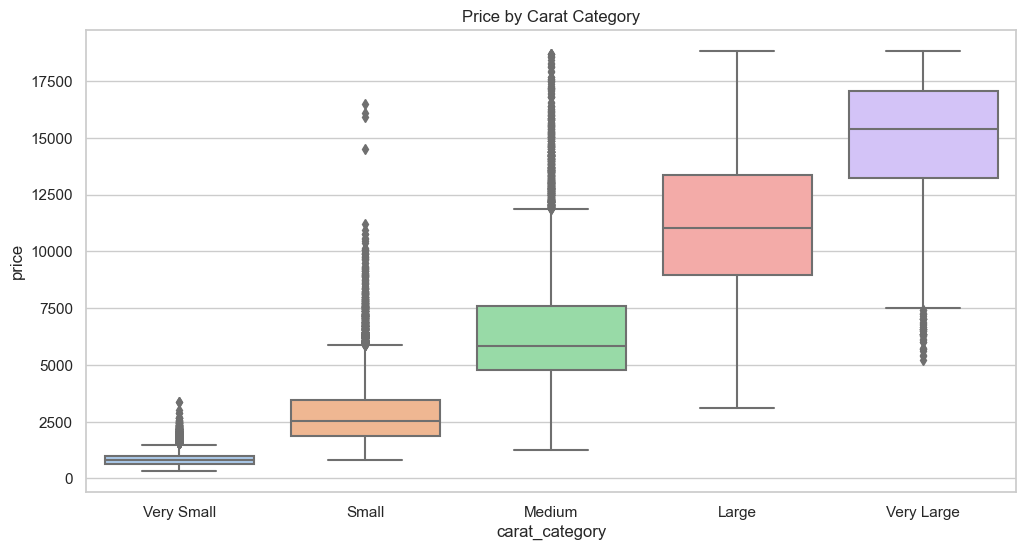

In [28]:
#Feature Engineering
# Add volume (x*y*z)
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# Remove zero or invalid volumes
diamonds = diamonds[(diamonds['volume'] > 0) & (diamonds['volume'] < 800)]

# Price vs Volume
sns.scatterplot(x='volume', y='price', data=diamonds[:10000])
plt.title("Price vs Volume")
plt.show()

# Carat Bins
bins = [0, 0.5, 1, 1.5, 2, 5]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
diamonds['carat_category'] = pd.cut(diamonds['carat'], bins=bins, labels=labels)

sns.boxplot(x='carat_category', y='price', data=diamonds)
plt.title("Price by Carat Category")
plt.show()


In [29]:
#Conclusions:
print("🔍 Conclusions Made:")
print("- Carat and price have a strong positive correlation.")
print("- The ‘cut’ and ‘clarity’ categories influence price distributions.")
print("- Outliers exist in price, carat, and dimensions — especially high-end diamonds.")
print("- Volume (x*y*z) can be a useful derived feature for price prediction.")
print("- Diamonds with ideal cut and better clarity tend to be more expensive.")


🔍 Conclusions Made:
- Carat and price have a strong positive correlation.
- The ‘cut’ and ‘clarity’ categories influence price distributions.
- Outliers exist in price, carat, and dimensions — especially high-end diamonds.
- Volume (x*y*z) can be a useful derived feature for price prediction.
- Diamonds with ideal cut and better clarity tend to be more expensive.
